# CSCI 636: Pattern Recognition & Data Mining I
## Spotlight: Anomaly Detection
###  A S M Shahadat Hossain (Z-1907296), Michael Welford (Z-1679714)

### 1. Introduction

In recent times, data scientists have been contributing much to make our daily lives easier. **Anomaly detection** is one of the techniques found quite effective in solving some challenging reallife problems. Anomaly detection (also known as outlier detection) is the determination of points in a data set that are abnormally different from the expected distribution of data samples. There are two types of outliers: **univariate** (those that depend on only one feature) and **multivariate** (those that depend on more than one feature). Due to its broad number of applications, as well as its significance in data science, ‘Anomaly Detection’ is an interesting area to explore.

Its applications include, but are not limited, to the following: 
 * Credit card fraud detection
 * Cancer cell identification
 * Manufacturing fault detection
 * Network intrusion detection
 * System malfunctioning prediction
 * General data pre-processing

Outliers can be caused by a variety of reasons such as:
* Human errors during data entry
* Faulty instruments
* Experiemental issues 
* Values intentionally entered incorrectly
* Data processing problems
* Sampling errors


### 2. Methodology

Anomaly detection can be done using a number of techniques such as classification, clustering and also using some metrics. Here, different techniques have been applied on different real data as well as synthetic data. Among the classification algorithms, **Isolation forest** and **K-Nearest Neighbors** were used. Besides, **K-Means, DBSCAN,** and **Local Outlier Factor** were three examples of clustering algorithms used to spot outliers. We have also implemented some metrics and visualizations such as **Z-Score, Box Plot,** and **Minimum Covariace Determinant** to find anomalous data points in the datasets.

### 3. Implementation

In [1]:
# Importing required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

### 3.1 Iris dataset with added outlier

The iris dataset is useful for a variety of data science tutorial.
For this tutorial, a manual outlier has been added at index 50 shown below with values (1.0, 2.0, 4.0, 0.6) to the Setosa class.

In [2]:
# Create pandas data frame by reading a data file.
# The iris_w_outlier file contains the iris dataset with an added outlier row.
new_iris = pd.read_csv('iris_w_outlier.csv')
new_iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# Show the outlier added to the iris dataset at index 50.
new_iris[new_iris.variety=='Setosa'].tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
46,5.1,3.8,1.6,0.2,Setosa
47,4.6,3.2,1.4,0.2,Setosa
48,5.3,3.7,1.5,0.2,Setosa
49,5.0,3.3,1.4,0.2,Setosa
50,1.0,2.0,4.0,0.6,Setosa


In [4]:
# Separate the features from the class labels using the drop method.
X_iris = new_iris.drop('variety', axis=1)
X_iris

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [5]:
# Set y to be the set of class labels.
y_iris = new_iris['variety']
y_iris

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
146    Virginica
147    Virginica
148    Virginica
149    Virginica
150    Virginica
Name: variety, Length: 151, dtype: object

We can see below that the additional outlier shifts the mean and standard deviation for each slightly in the overall dataset while not shifting the quantiles.

In [6]:
# Import the original iris dataset and print the descriptive statistics.
iris = pd.read_csv('iris.csv')
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Print the descriptive statistics for the iris dataset with the outlier added.
new_iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,151.000000,151.000000,151.000000,151.000000
mean,5.811258,3.050331,3.759603,1.195364
std,0.914589,0.442850,1.759514,0.761257
min,1.000000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


However, for the Setosa class, the standard deviation of the sepal.length increases greatly.

In [8]:
# Print descriptive statistics for just the Setosa class of the original Iris
# dataset.
iris[iris.variety=='Setosa'].describe()

,sepal.length,sepal.width,petal.length,petal.width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [9]:
# Print descriptive statistics for the Setosa class with the outlier added.
new_iris[new_iris.variety=='Setosa'].describe()

,sepal.length,sepal.width,petal.length,petal.width
count,51.000000,51.000000,51.000000,51.000000
mean,4.927451,3.400000,1.511765,0.252941
std,0.660630,0.425206,0.394790,0.115504
min,1.000000,2.000000,1.000000,0.100000
25%,4.800000,3.150000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.650000,1.600000,0.300000
max,5.800000,4.400000,4.000000,0.600000


### 3.2 Housing Dataset: Initial Model

In [10]:
# Import the housing dataset.
housing = pd.read_csv('housing.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


The housing dataset contains 14 features.
The last feature is the "median value of owner-occupied homes in $1000's", and it is used as the y value for a linear regession problem with the rest used as x-values.


In [11]:
# Separate the housing data into X and y subsets.
X_housing,y_housing = housing.values[:, :-1], housing.values[:, -1]

In [12]:
# Perform the training and testing split.
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.25, random_state=42)

In [13]:
# Initialize and fit the linear regressor.
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the y values using the test set.
y_predict = lr.predict(X_test)

# Calculate the mean absolute error.
error = mean_absolute_error(y_test, y_predict)

In [14]:
# Print the results for Local Outlier Factor.
print("Mean Absolute Error: {:.2f}".format(error))

Mean Absolute Error: 3.06


### 3.3 Box Plot

A box plot can be used to visualize outliers on a feature by feature basis.
The box in the box plot shows the 25th, 50th, and 75th percentiles respectively (bottom line, middle line, and top line).
The whiskers of the boxpot show the interval (+/- ***whis * IQR***).
Any values outside this interval are marked as outliers.

For more information: https://seaborn.pydata.org/generated/seaborn.boxplot.html

We can set the whisker length using the ***whis*** parameter.

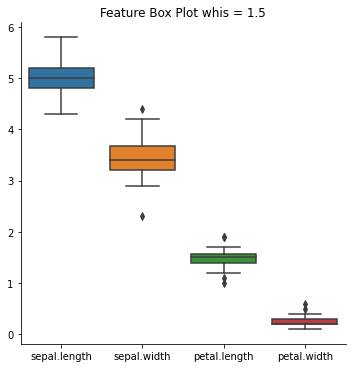

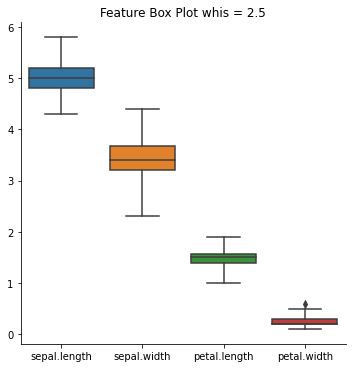

In [15]:
# Show the box plot for the original iris dataset.
# Default whis = 1.5
_ = sns.catplot(data=iris[iris.variety=='Setosa'], kind='box')
plt.title('Feature Box Plot whis = 1.5')
# Change the whisker length to 2.5.
_ = sns.catplot(data=iris[iris.variety=='Setosa'], kind='box', whis=2.5)
plt.title('Feature Box Plot whis = 2.5')
plt.show()

We can see below that the addition of an outlier is detected for sepel.length around 1, but also that the wisker positions for the other features have changed. 

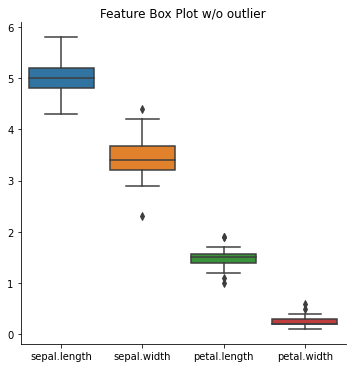

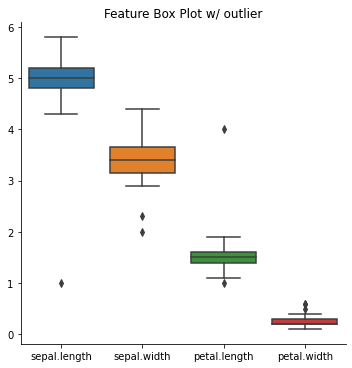

In [16]:
# Box plot of Setosa data with and without the outlier added at index 50.
_ = sns.catplot(data=iris[iris.variety=='Setosa'], kind='box')
plt.title('Feature Box Plot w/o outlier')
_ = sns.catplot(data=new_iris[new_iris.variety=='Setosa'], kind='box')
plt.title('Feature Box Plot w/ outlier')
plt.show()

### 3.4 Parametric Method: Z-Score

Another simple technique for determining outlier is to standardize the data and then using a threshold as a cutoff value. 
Each x value is transformed into a z-score using the equation:
<center>$z = (x - u) / s$</center>
Any standardized value with absolute value greater than the threshold (abs(z) > t) is determined to be an outlier. 

In [17]:
# Find outliers in a single dimension.
def find_outliers(data, threshold):
    # Get the mean and standard deviation of the data series.
    mean = np.mean(data)
    sd = np.std(data)
    outliers = [value for value in data if abs((value-mean)/sd) > threshold]
    return outliers

# Show the outlier value in the sepal.length.
find_outliers(new_iris['sepal.length'], 3)

[1.0]

A more advanced method for using the standard z-score is using the ***StandardScaler*** class from ***sklearn.preprocessing***.
The ***StandardScaler*** can transform a passed set of numerical data to give the number of standard deviations from the mean each value is found. A threshold can then similarly be used to determine outliers.

Useful attributes include:
***mean_***: an array of feature mean values
***var_***: an array of feature variance values
***n_features_in***: the number of features used to fit the data.

Useful methods include:
* ***fit***: find the mean and standard deviations for each feature.
* ***fit_transform***: perform the above action and then transform the data.
* ***inverse_transform***: returns the data to its unscaled state.
* ***transform***: standarizes the passed data.

For more information see: 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [18]:
# Import the StandardScaler class.
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler.
scaler = StandardScaler()

# Transform the X values into z-scores.
scaled_X = scaler.fit_transform(new_iris.drop('variety', axis=1))

# Show a preview of the scaled X values.
scaled_X[:5]

array([[-0.78026903,  1.01877562, -1.34551617, -1.31187898],
       [-0.99967429, -0.11403085, -1.34551617, -1.31187898],
       [-1.21907954,  0.33909174, -1.40253917, -1.31187898],
       [-1.32878217,  0.11253044, -1.28849318, -1.31187898],
       [-0.88997166,  1.24533691, -1.34551617, -1.31187898]])

In [19]:
# Set the threshold value and determine values outside the threshold.
threshold = 3
new_iris[abs(scaled_X) > threshold]

,sepal.length,sepal.width,petal.length,petal.width,variety
15,5.7,4.4,1.5,0.4,Setosa
50,1.0,2.0,4.0,0.6,Setosa


### 3.5 Ensemble Method: Isolation Forest

***Isolation forest*** is useful for high dimensional datasets. The ensemble random forest classifier which uses decision trees is fit by the following steps:
1. A feature is chosen at random and threshold value is chosen randomly that is between the minimum and maximum values of the feature. 
2. The data is then separated based on this threshold value.
3. Steps 1 and 2 are repeated until all data points are separated into individual leaf nodes.

Anomalies are usually separated from the rest of the data in the fewest number of steps. (smallest path length from the root node of a given decision tree)

4. The average path length for n decision tree estimators is then used to determine anomalies.


The ***IsolationForest*** class from the ***sklearn.ensemble*** package has several useful parameters:
* ***n_estimators***: the number of decision tree estimators used (default = 100)
* ***max_samples***: the number of samples to use when training each estimator
* ***contamination***: the proportion of expected outliers in the data set
* ***max_features***: the maximum number of features used to produce each tree in the random forest.
* ***bootstrap***: True - Random subsets with replacement are used to produce each decision tree.
           False - Random subsets without replacement are used.
* ***random_state***: sets the seed value for the randomizer

For more information see: 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [20]:
# Import the classifier.
from sklearn.ensemble import IsolationForest

### 3.5.1 Isolation Forest: Iris

In [21]:
# Initialize the classifier.
iso_iris = IsolationForest(contamination=(1/151))

In [22]:
# Fit the classifier for the iris dataset.
y_predict = iso_iris.fit_predict(X_iris)

In [23]:
# Find the outlier by determining which values are not outliers.
mask_iso_iris = y_predict != -1
mask_iso_iris

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [24]:
# Determine and print the index value for the outlier.
iso_iris_outlier_index = [i for i in range(len(mask_iso_iris)) if mask_iso_iris[i] == False]
print(iso_iris_outlier_index)

[50]


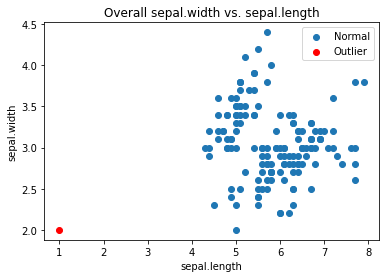

In [25]:
# Show the outlier from the iris dataset using Isolation Forest.
plt.scatter(new_iris[mask_iso_iris]['sepal.length'], new_iris[mask_iso_iris]['sepal.width']) 
plt.scatter(new_iris[mask_iso_iris==False]['sepal.length'], new_iris[mask_iso_iris==False]['sepal.width'], c='red')
plt.legend(['Normal', 'Outlier'])
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')
plt.title('Overall sepal.width vs. sepal.length')
plt.show()

### 3.5.2 Isolation Forest: Housing

In [26]:
# Read the housing data. 
housing = pd.read_csv('housing.csv')

# Split the data into X, and y values.
X_housing,y_housing = housing.values[:, :-1], housing.values[:, -1]

# Perform the training and testing split.
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.25, random_state=42)

In [27]:
# Initialize the classifier.
iso_housing = IsolationForest(contamination=0.1)

# Predict fit and predict values using the training data.
y_predict = iso_housing.fit_predict(X_train)

In [28]:
# Determine which data points are not outliers.
mask_iso_housing = y_predict != -1
mask_iso_housing

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [29]:
# Remove outliers from training data.
X_train, y_train = X_train[mask_iso_housing, :], y_train[mask_iso_housing]

In [30]:
# Initialize and fit the linear regression classifier.
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the y values using the test set.
y_predict = lr.predict(X_test)

# Calculate the mean absolute error.
error = mean_absolute_error(y_test, y_predict)

In [31]:
# Print the results for Isolation Forest.
print("Training Data size: {}\n# of Outliers: {}\nProprotion of Outliers: {}".format(len(mask_iso_housing), sum(mask_iso_housing == False), sum(mask_iso_housing == False)/ len(mask_iso_housing)))
print("Mean Absolute Error: {:.2f}".format(error))

Training Data size: 379
# of Outliers: 38
Proprotion of Outliers: 0.10026385224274406
Mean Absolute Error: 3.05


### 3.6 Covariance Method: Minimum Covariance Determinant

Minimum Covariance Determinant makes two assumptions:
1. The data set should have a gaussian distribution.
2. The outliers are found in a non-gaussian distribution.

The classifier estimates the guassian parameters of the data while ignoring outliers. An elliptical boundary is produced around data it determines to be normal, and anything outside the ellipse is classified as an outlier. 

The ***EllipticEnvelope*** class from the ***sklearn.covariance*** package has several useful parameters:
* ***store_precision***: If set to True, the precision of the classifier is stored in the attribute ***precision_***. (True by default)
* ***assume_centered***: If set the True, locations and covariances are computed without the data also being centered.
* ***contamination***: the proportion of expected outliers in the data set (default = 0.1)
* ***random_state***: sets the seed value for the randomizer

For more information see: 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [32]:
# Import the EllipticEnvelop class.
from sklearn.covariance import EllipticEnvelope

### 3.6.1 Minimum Covaraince Determinant: Iris

In [33]:
# Initialize the outlier classifier.
ee_iris = EllipticEnvelope(contamination = (1/151))

# Fit the X values and use predict to find outliers.
y_predict = ee_iris.fit_predict(X_iris)

# Determine which values are not outliers.
mask_ee_iris = y_predict != -1
mask_ee_iris

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [34]:
# An example of the covariance matrix produced for the 4 different features.
ee_iris.covariance_

array([[ 0.55592152, -0.09134921,  1.08666226,  0.43006614],
       [-0.09134921,  0.19673469, -0.43651927, -0.16510204],
       [ 1.08666226, -0.43651927,  2.80874087,  1.12258314],
       [ 0.43006614, -0.16510204,  1.12258314,  0.46769274]])

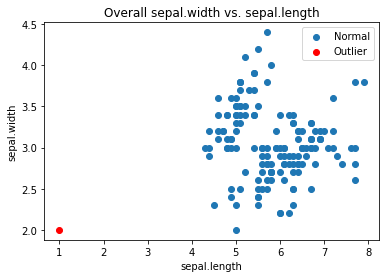

In [35]:
# Show the outlier in the iris dataset using the Minimum Covariance Determinant.
plt.scatter(new_iris[mask_ee_iris]['sepal.length'], new_iris[mask_ee_iris]['sepal.width']) 
plt.scatter(new_iris[mask_ee_iris==False]['sepal.length'], new_iris[mask_ee_iris==False]['sepal.width'], c='red')
plt.legend(['Normal', 'Outlier'])
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')
plt.title('Overall sepal.width vs. sepal.length')
plt.show()

### 3.6.2 Minimum Covariance Determinant: Housing

In [36]:
# Read housing data.
housing = pd.read_csv('housing.csv')

# Separate the X and y values.
X_housing,y_housing = housing.values[:, :-1], housing.values[:, -1]

# Perform the testing and training data split.
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.25, random_state=42)

In [37]:
# Initialize the outlier classifier.
ee_housing = EllipticEnvelope(contamination=0.1)

# Use fit_predit to determine which values are outliers.
y_predict = ee_housing.fit_predict(X_train)

In [38]:
# Find which values are not outliers.
mask_ee_housing = y_predict != -1
mask_ee_housing

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,

In [39]:
# Remove outliers from training data.
X_train, y_train = X_train[mask_ee_housing, :], y_train[mask_ee_housing]

In [40]:
# Initialize and fit the linear regression classifier.
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the y values using the test set.
y_predict = lr.predict(X_test)

# Calculate the mean absolute error.
error = mean_absolute_error(y_test, y_predict)

In [41]:
# Print the results for Minimum Covariance Determinant.
print("Training Data size: {}\n# of Outliers: {}\nProprotion of Outliers: {}".format(len(mask_ee_housing), sum(mask_ee_housing == False), sum(mask_ee_housing == False)/ len(mask_ee_housing)))
print("Mean Absolute Error: {:.2f}".format(error))

Training Data size: 379
# of Outliers: 38
Proprotion of Outliers: 0.10026385224274406
Mean Absolute Error: 3.10


### 3.7 Local Outlier Factor

Local Outlier Factor compares the densities of data points around a given point to the densities of its neighbors.


The ***LocalOutlierFactor*** class from the ***sklearn.neighbors*** package has several key parameters:
* ***n_neighbors***: the number of neighbors used to a maximum value equal to the number of samples (default = 20)
* ***algorithm***: the algorithm the classifier uses to determine the nearest neighbors
* ***metric***: the distance metric used (cosine, euclidean, mahalanobis, minkowski, etc.)
* ***p***: The parameter for the minkowski metric if used.
* ***contamination***: the proportion of expected outliers in the data set
* ***novelty***: set the true if performing novelty detection rather than outlier detection.
For more information see: 

For more information see: 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

In [42]:
# Import the LocalOutlierFactor class
from sklearn.neighbors import LocalOutlierFactor

### 3.7.1 Local Outlier Factor: Iris

In [43]:
# Initialize the classifier.
lof_iris = LocalOutlierFactor(contamination=1/151)

In [44]:
# Use fit_predict to produce a boolean array.
# False -> an outlier.
y_predict = lof_iris.fit_predict(X_iris)
mask_lof_iris = y_predict != -1
mask_lof_iris

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

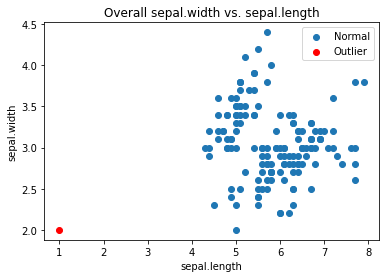

In [45]:
# Make a scatter plot for the iris dataset using the Local Outlier Factor.
plt.scatter(new_iris[mask_lof_iris]['sepal.length'], new_iris[mask_lof_iris]['sepal.width']) 
plt.scatter(new_iris[mask_lof_iris==False]['sepal.length'], new_iris[mask_lof_iris==False]['sepal.width'], c='red')
plt.legend(['Normal', 'Outlier'])
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')
plt.title('Overall sepal.width vs. sepal.length')
plt.show()

### 3.7.2 Local Outlier Factor: Housing

In [46]:
housing = pd.read_csv('housing.csv')
housing.head()
X_housing,y_housing = housing.values[:, :-1], housing.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.25, random_state=42)

In [47]:
# Initialize the classifier.
lof_housing = LocalOutlierFactor(contamination=0.1)
y_predict = lof_housing.fit_predict(X_train)

In [48]:
# Determine which data points are outliers.
mask_lof_housing = y_predict != -1
mask_lof_housing

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False,  True,

In [49]:
# Remove outliers from training data.
X_train, y_train = X_train[mask_lof_housing, :], y_train[mask_lof_housing]

In [50]:
# Initialize and fit the linear regression classifier.
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the y values using the test set.
y_predict = lr.predict(X_test)

# Calculate the mean absolute error.
error = mean_absolute_error(y_test, y_predict)

In [51]:
# Print the results for Local Outlier Factor.
print("Training Data size: {}\n# of Outliers: {}\nProprotion of Outliers: {}".format(len(mask_lof_housing), sum(mask_lof_housing == False), sum(mask_lof_housing == False)/ len(mask_lof_housing)))
print("Mean Absolute Error: {:.2f}".format(error))

Training Data size: 379
# of Outliers: 38
Proprotion of Outliers: 0.10026385224274406
Mean Absolute Error: 3.06


### 3.8 Anomaly Detection using Common Clustering Algorihtms

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt 
import scipy
import sklearn
import seaborn as sns 
import warnings 
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from numpy import random, where
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.ensemble import IsolationForest 
from sklearn.neighbors import LocalOutlierFactor 
from pyod.models.knn import KNN  
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.preprocessing import StandardScaler
%matplotlib inline 
warnings.filterwarnings('ignore')

### 3.8.1 Anomaly Detection using K-Means Clustering 
Adapted from https://medium.datadriveninvestor.com/outlier-detection-with-k-means-clustering-in-python-ee3ac1826fb0 <br>
K-Means Clustering: https://en.wikipedia.org/wiki/K-means_clustering

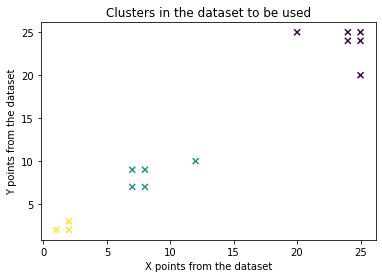

In [53]:
# composing data set
data = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 9], [7, 9], [7, 7], [12,10], [25, 24], [24, 24], [24, 25], [25, 25], [25,20], [20,25]])

# kmeans model, setting k = 3
km = KMeans(n_clusters = 3)
clusters = km.fit_predict(data)

# plotting data set
plt.scatter(*zip(*data), c = clusters, marker = 'x')
plt.title('Clusters in the dataset to be used')
plt.xlabel('X points from the dataset')
plt.ylabel('Y points from the dataset')
plt.show()

In [54]:
# obtaining the centers of the clusters
centroids = km.cluster_centers_

# points array will be used to reach the index easy
points = np.empty((0, len(data[0])), float)

# distances will be used to calculate outliers
distances = np.empty((0, len(data[0])), float)

# getting points and distances
for i, center_elem in enumerate(centroids):
    # cdist is used to calculate the distance between center and other points
    distances = np.append(distances, cdist([center_elem], data[clusters == i], 'euclidean')) 
    points = np.append(points, data[clusters == i], axis=0)

In [55]:
# getting outliers whose distances are greater than some percentile
percentile = 80
outliers = points[np.where(distances > np.percentile(distances, percentile))]

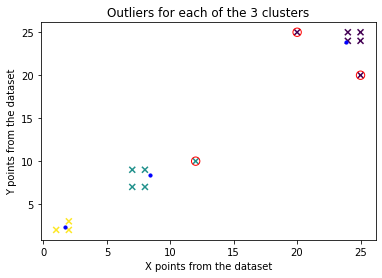

In [56]:
fig = plt.figure()

# plotting initial data
plt.scatter(*zip(*data), c = clusters, marker = 'x')

# plotting red ovals around outlier points
plt.scatter(*zip(*outliers), marker = 'o', facecolor = 'None', edgecolor = 'r', s = 70);

# plotting centers as blue dots
plt.scatter(*zip(*centroids), marker = 'o', facecolor = 'b', edgecolor = 'b', s = 10);

plt.title('Outliers for each of the 3 clusters')
plt.xlabel('X points from the dataset')
plt.ylabel('Y points from the dataset')
plt.show()

### 3.8.2 Anomaly Detection using DBSCAN Clustering 
Adapted from https://www.datatechnotes.com/2020/04/anomaly-detection-with-dbscan-in-python.html <br>
DBSCAN Clustering: https://towardsdatascience.com/understanding-dbscan-algorithm-and-implementation-from-scratch-c256289479c5

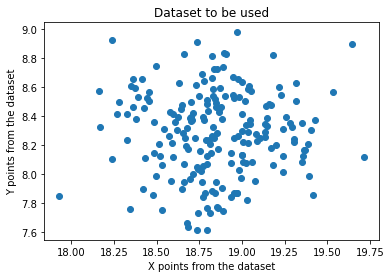

In [57]:
# random dataset generation
random.seed(7)
x, _ = make_blobs(n_samples = 200, centers = 1, cluster_std = .3, center_box = (20, 5))

# visualizing the dataset to be used
plt.scatter(x[:,0], x[:,1])
plt.title('Dataset to be used')
plt.xlabel('X points from the dataset')
plt.ylabel('Y points from the dataset')
plt.show()

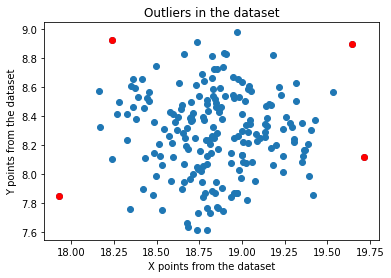

In [58]:
# applying DBSCAN on the dataset
dbscan = DBSCAN(eps = 0.28, min_samples = 20)
pred = dbscan.fit_predict(x)

# extracting negative outputs as the outliers
anom_index = where(pred == -1)
values = x[anom_index]

# visualizing the outliers
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.title('Outliers in the dataset')
plt.xlabel('X points from the dataset')
plt.ylabel('Y points from the dataset')
plt.show()

### 3.9 Anomaly Detection using K-Nearest Neighbors Classification 
Adapted from https://medium.com/analytics-vidhya/introduction-to-anomaly-detection-using-machine-learning-with-a-case-study-part-two-f78243f74d2f <br>
K-Nearest Neighbors Classification: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [59]:
# importing the dataset from a CSV file
data = pd.read_csv("creditcard.csv")
data.shape

(284807, 31)

In [60]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
# determining number of fraud cases in our  file
data.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

<AxesSubplot:>

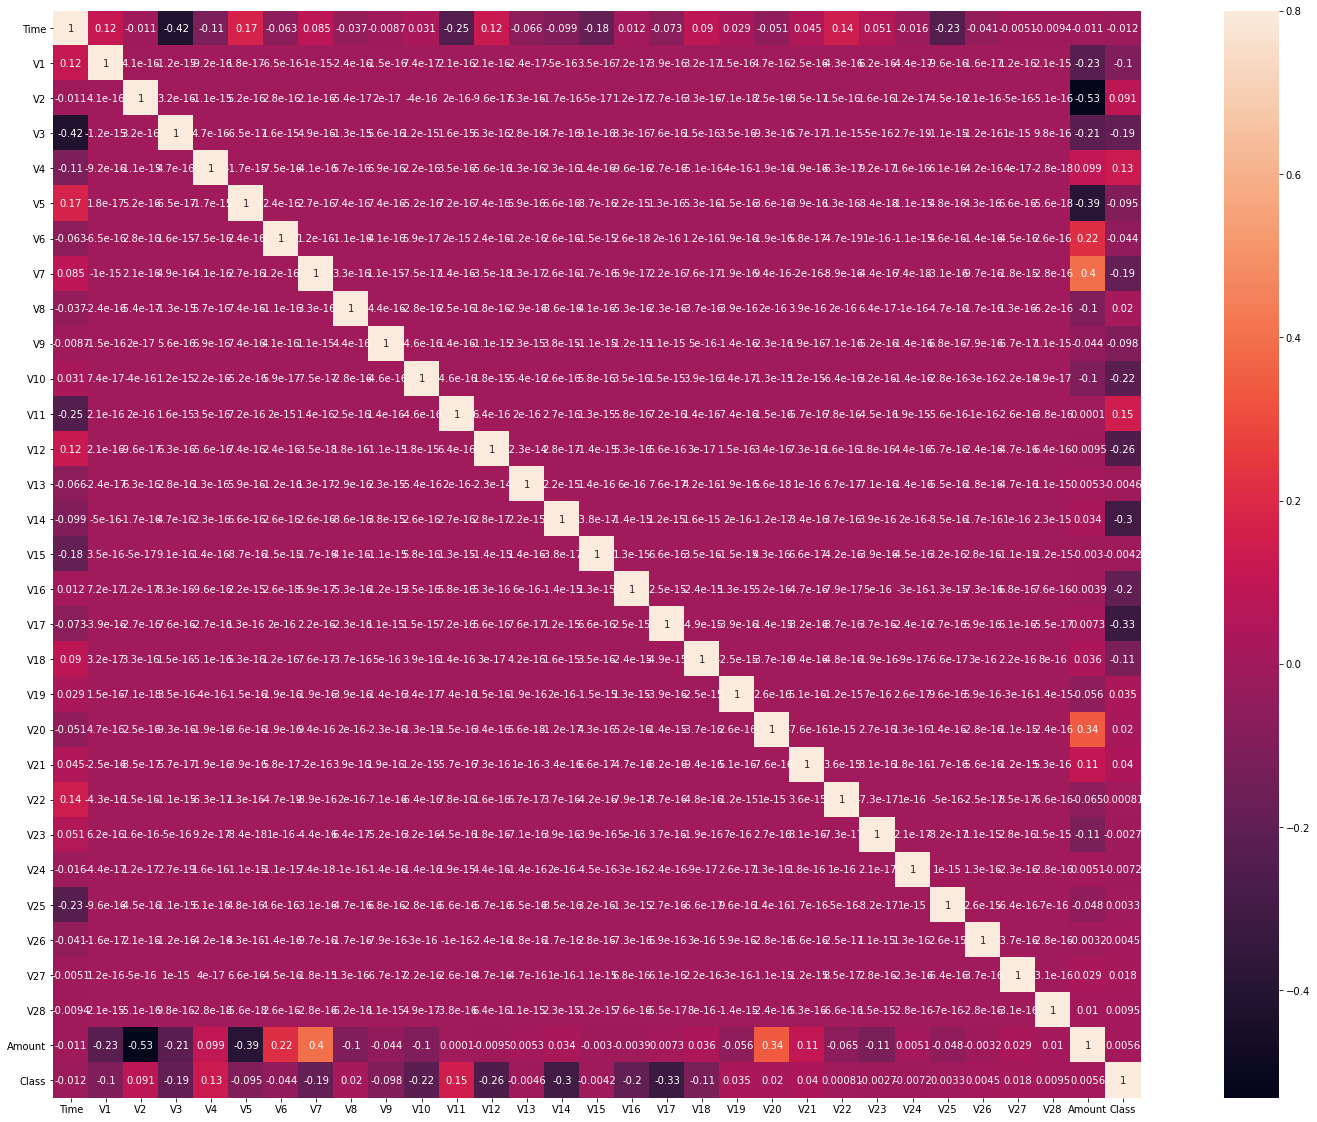

In [62]:
#finding the correlation betweeen the variables 
corr = data.corr() 

fig = plt.figure(figsize=(30,20))

sns.heatmap(corr, vmax=.8, square=True,annot=True)

In [63]:
# using sample of the dataset 

positive = data[data["Class"]== 1]
negative = data[data["Class"]== 0]


print("Positive:{}".format(len(positive)))
print("Negative:{}".format(len(negative)))

new_data = pd.concat([positive,negative[:10000]])

#shuffling our dataset 
new_data = new_data.sample(frac=1,random_state=42)


new_data.shape

Positive:492
Negative:284315


(10492, 31)

In [64]:
# Normalising the amount column
new_data['Amount'] = StandardScaler().fit_transform(new_data['Amount'].values.reshape(-1,1))

In [65]:
# splitting into independent variables and target variable
X = new_data.drop(['Time','Class'], axis=1) 
y = new_data['Class']  

# showing the shape of X and y  
print("X shape: {}".format(X.shape)) 
print("y shape: {}".format(y.shape))

X shape: (10492, 29)
y shape: (10492,)


In [66]:
#splitting the data into train and test 
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=42 )

In [67]:
# creating the KNN model
clf_knn = KNN(contamination=0.172, n_neighbors = 5,n_jobs=-1)
clf_knn.fit(X_train)

# getting the prediction labels of the training data 
y_train_pred = clf_knn.labels_ # binary labels (0: inliers, 1: outliers) 

# finding the outlier scores 
y_train_scores = clf_knn.decision_scores_ 

# evaluating on the training data
evaluate_print('KNN', y_train, y_train_scores)

KNN ROC:0.9566, precision @ rank n:0.5482


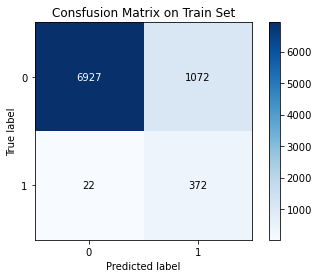

In [68]:
# plotting the comfusion matrix for the train set 
skplt.metrics.plot_confusion_matrix(y_train, y_train_pred, normalize = False, title = 'Consfusion Matrix on Train Set')
plt.show()

In [69]:
# finding the outlier scores
y_test_scores = clf_knn.decision_function(X_test)  

# evaluating on the training data
evaluate_print('KNN', y_test,y_test_scores)

KNN ROC:0.9393, precision @ rank n:0.5408


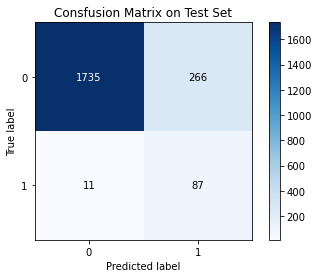

In [70]:
# plotting the comfusion matrix  in the test set
y_preds = clf_knn.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test,y_preds, normalize = False, title='Consfusion Matrix on Test Set')
plt.show()

### 4. References

### Datasets Used

* https://gist.github.com/netj/8836201 (Iris)
* https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv (housing)
* https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names (housing feature names)
* https://www.kaggle.com/mlg-ulb/creditcardfraud (credit card fraud detection dataset)

### Other Sources

* Partially adapted from tutorials from https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
* Partially adapted from https://medium.datadriveninvestor.com/outlier-detection-with-k-means-clustering-in-python-ee3ac1826fb0 
* https://en.wikipedia.org/wiki/K-means_clustering
* Partially adapted from https://www.datatechnotes.com/2020/04/anomaly-detection-with-dbscan-in-python.html 
* https://towardsdatascience.com/understanding-dbscan-algorithm-and-implementation-from-scratch-c256289479c5
* Partially adapted from https://medium.com/analytics-vidhya/introduction-to-anomaly-detection-using-machine-learning-with-a-case-study-part-two-f78243f74d2f 
* https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
* https://towardsdatascience.com/z-score-for-anomaly-detection-d98b0006f510
* https://seaborn.pydata.org/generated/seaborn.boxplot.html
* https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
* https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection
* https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html#examples-using-sklearn-covariance-ellipticenvelope
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
* https://en.wikipedia.org/wiki/Anomaly_detection#Popular_techniques
* Geron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O’Reilly.